<a href="https://colab.research.google.com/github/adam-foley/Survivor/blob/main/SurvivorData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
A - Nate, Ozzy, Becky
V - Candice, Cecelia, Adam

# Connect to DB

In [ ]:
%pip install pymysql

import matplotlib.pyplot as plt
import os
import pymysql
import pandas as pd
import numpy as np

In [ ]:
succeess = False

while not succeess:
  password = input("Password: ")
  try:
    conn = pymysql.connect(
        host='aws-survivor.cpapv35x7rsh.us-east-2.rds.amazonaws.com',
        port=int(3306),
        user="admin",
        passwd=password,
        db="survivor_data",
        charset='utf8mb4')
    succeess = True
  except:
    print("Wrong Password")

print("Connection Made")

Password: Frederickwilliams121234
Connection Made


# State Bias

In [ ]:
num_place = 7
denom_place = 20



df = pd.read_sql_query("Select s.*, p.sex, p.state from Seasons s left join Players p on p.survivor_id = s.survivor_id ", conn)

total = df[df.place <= denom_place]
total_placed = pd.DataFrame(total['season_id'].groupby(df.state).count()).rename(columns={'season_id':'Top '+str(denom_place)})

top = df[df.place <= num_place]
top_placed = pd.DataFrame(top['season_id'].groupby(top.state).count()).rename(columns={'season_id':'Top '+str(num_place)})

state_total_jury= pd.merge(top_placed, total_placed, on='state').sort_values(by=['Top '+str(num_place),'Top '+str(denom_place)], ascending=False)

state_total_jury['% in top placed'] = state_total_jury['Top '+str(num_place)] / state_total_jury['Top '+str(denom_place)]
state_total_jury = state_total_jury.sort_values(by=['% in top placed','Top '+str(denom_place)], ascending=False)

state_total_jury[state_total_jury['Top '+str(denom_place)] > 1 ]

# Male and Female Representation by Place

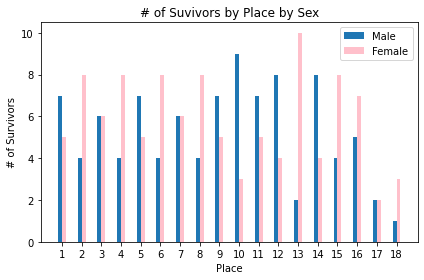

In [ ]:
male_place_count = df[df.sex == 'M']
male_place_count = pd.DataFrame(male_place_count['season_id'].groupby(male_place_count.place).count()).rename(columns={'season_id':'male count'})
female_place_count = df[df.sex == 'F']
female_place_count = pd.DataFrame(female_place_count['season_id'].groupby(female_place_count.place).count()).rename(columns={'season_id':'female count'})

place_count = male_place_count.merge(female_place_count, on='place')

male_count = place_count['male count'].to_list()
female_count = place_count['female count'].to_list()


labels = np.arange(1, len(male_count)+1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label='Male')
rects2 = ax.bar(x + width/2, female_count, width, label='Female', color=('pink'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Place')
ax.set_ylabel('# of Survivors')
ax.set_title('# of Suvivors by Place by Sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

# Picks by Place

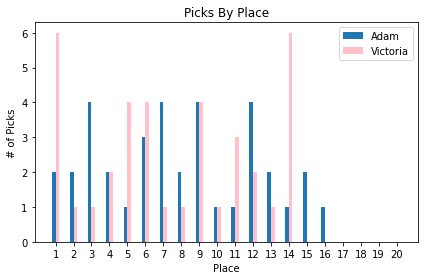

In [ ]:
votes = df[['place', 'vote_adam','vote_victoria']].groupby(['place']).agg(['sum'])

adamVotes = votes['vote_adam']['sum'].to_list()
victoriaVotes = votes['vote_victoria']['sum'].to_list()

labels = np.arange(1, len(adamVotes)+1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, adamVotes, width, label='Adam')
rects2 = ax.bar(x + width/2, victoriaVotes, width, label='Victoria', color=('pink'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Place')
ax.set_ylabel('# of Picks')
ax.set_title('Picks By Place')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

# Best Pick by Season


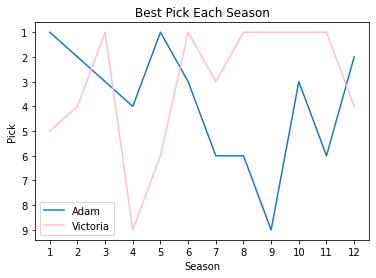

In [ ]:
maxSeasons = pd.read_sql_query("Select Distinct Max(season_id) as 'season' from survivor_data.Seasons", conn)['season'].values[0] + 1

first_a = []
second_a = []
third_a = []

first_v = []
second_v = []
third_v = []

for season in range(1, maxSeasons):
  query = 'Select season_id, place from survivor_data.Seasons where vote_adam = 1 and season_id = ' + str(season) + ' Order By place ASC'
  data = pd.read_sql_query(query, conn)
  first_a.append(data.iloc[0]['place'])
  second_a.append(data.iloc[1]['place'])
  third_a.append(data.iloc[2]['place'])

for season in range(1, maxSeasons):
  query = 'Select season_id, place from survivor_data.Seasons where vote_victoria = 1 and season_id = ' + str(season) + ' Order By place ASC'
  data = pd.read_sql_query(query, conn)
  first_v.append(data.iloc[0]['place'])
  second_v.append(data.iloc[1]['place'])
  third_v.append(data.iloc[2]['place'])

seasons = np.arange(1, season+1).tolist()

plt.xticks(seasons)
plt.gca().invert_yaxis()



plt.plot(seasons, first_a,label="Adam")
plt.plot(seasons, first_v, label="Victoria",color=('pink'))

plt.title('Best Pick Each Season')
plt.xlabel('Season')
plt.ylabel('Pick')
plt.legend()
plt.show()